In [71]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import time
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 2.5})
time_start = time.time()

In [72]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    #print("palette ", palette)

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []
    clusters = []
    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.mean(x[colors == i, :], axis=0)
        clusters.append([xtext,ytext])
        print("Avg Node Cluster Distance of Cluster ", i, " is ", np.mean(np.sqrt(np.sum((np.array(x[colors == i, :]) - np.mean(x[colors == i, :], axis=0))**2,axis = 1))))
        print("Cluster ",i," Center ",np.mean(x[colors == i, :], axis = 0))
        txt = ax.text(xtext, ytext, str(i), fontsize=10)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    n = list(range(len(clusters)))
    for i in range(len(clusters)):
        print("Cluster Distance between ", i, " and others ")
        l = clusters.copy()
        l.pop(i)
        N = n.copy()
        N.pop(i)
        for j in range(len(l)):
            print(N[j]," ",np.sqrt(np.sum((np.array(clusters[i]) - np.array(l[j]))**2)))

    #return f, ax, sc, txts

In [73]:
n = list(range(5))
n

[0, 1, 2, 3, 4]

In [2]:
file = open("NET_DEBT_EBITDA_Data.csv", "r")
next(file)
NDE_Dict = {}
n = 0

for row in file:
    i,m,date,d = row.split(",")

    if i in NDE_Dict.keys():
        _,D = d.split(":")
        y,_,_ = date.split('-')
        y = int(y[1:])
        NDE_Dict[i].append((y,float(D[1:4])))
    else:
        _,D = d.split(":")
        D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        NDE_Dict[i] = [(y,float(D[1:4]))]
        

file.close()
n = 0
for i in NDE_Dict.items():
    print(i,"\n")
    n += 1
    if n == 10:
        break

('"00017f58-baec-51fd-9a90-e2acae968457"', [(1997, 0.0), (1996, 0.9), (1995, 1.2)]) 

('"0001e381-e787-576d-8183-56e0f5f4a895"', [(2007, 1.0), (2006, 0.1), (2005, 0.8)]) 

('"00023c5a-004b-53a9-b57f-fca73cca257f"', [(2005, 6.0), (2004, 7.4), (2003, 7.2), (2002, 7.4), (2001, 6.4), (2000, 5.5), (1999, 5.6), (1998, 3.3), (1997, 2.5), (1996, 2.6), (1995, 5.7)]) 

('"0004b29e-62ba-5f86-b3d5-4dcf0bd553b1"', [(2020, 4.0), (2019, 11.0), (2018, 31.0), (2017, 20.0), (2016, 2.0), (2015, 2.8), (2014, 5.5), (2013, 6.7), (2012, 11.0), (2011, -7.0), (2010, -2.0), (2009, -2.0), (2008, -0.0), (2007, 17.0), (2006, 1.8), (2005, 0.8), (2004, 1.1), (2003, 4.8), (2002, 4.6), (2001, 2.1), (2000, 2.0), (1999, 3.2), (1998, 2.6), (1997, 2.7)]) 

('"000a6285-b1d9-5767-9a9e-dc9b370fbb89"', [(2020, 2.0), (2019, 2.6), (2018, 3.3), (2017, 5.1), (2016, 3.1), (2015, 2.1), (2014, 1.1), (2013, 1.7), (2012, 1.3), (2011, 2.2), (2010, 1.7), (2009, 2.2), (2008, 1.7), (2007, 2.1), (2006, 2.4), (2005, 2.9), (2004, 1.7), (2003

In [3]:
print(len(NDE_Dict))

22733


In [5]:
def Get_Data(NDE_Dict):
    NDE_Year_Val_Dict = {}
    Year = []
    Data = []
    for i in NDE_Dict.items():
        ID,info = i
        year = []
        data = []
        for j in info:
            date,val = j
            year.append(date)
            data.append(val)

        Year.append(year)
        Data.append(data)


    ## Finding the Time Frame
    Data_Dict = {}
    n = 0
    X = []
    for i in range(len(Year)):
        if  all(x in Year[i] for x in list(range(2015,2020))):
            p = Year[i][0] - 2020
            q = p + 5
            if len(Data[i][p:q]) != 5:
                #print(Year[i])
                continue
            Data_Dict[n] = Data[i][p:q]
            X.append(Data[i][p:q])
            n += 1
    
    return X

X = Get_Data(NDE_Dict)
print(len(X))

# def Last_N_Year_Data(x):
#     X_N = []
    
#     for i in X:
#         X_N.append(i[-5:])
        
#     return X_N

# X_5 = Last_N_Year_Data(X)

3454


In [76]:
# for i in X:
#     print()
print(X[0])

[11.0, -7.0, -2.0, -2.0, -0.0, 17.0, 1.8, 0.8, 1.1, 4.8, 4.6, 2.1, 2.0, 3.2]


Avg Node Cluster Distance of Cluster  0  is  0.85414624
Cluster  0  Center  [ 26.662016 -13.641308]
Avg Node Cluster Distance of Cluster  1  is  0.7023969
Cluster  1  Center  [69.192665   7.8670645]
Avg Node Cluster Distance of Cluster  2  is  36.402496
Cluster  2  Center  [ 0.43617082 -0.7393235 ]
Avg Node Cluster Distance of Cluster  3  is  4.9318457
Cluster  3  Center  [ 48.962505 -27.680534]
Avg Node Cluster Distance of Cluster  4  is  0.3783763
Cluster  4  Center  [35.54275  -8.119688]
Cluster Distance between  0  and others 
1   47.6599
2   29.227661
3   26.351694
4   10.45733
Cluster Distance between  1  and others 
0   47.6599
2   69.29304
3   40.900993
4   37.254436
Cluster Distance between  2  and others 
0   29.227661
1   69.29304
3   55.503456
4   35.87397
Cluster Distance between  3  and others 
0   26.351694
1   40.900993
2   55.503456
4   23.721645
Cluster Distance between  4  and others 
0   10.45733
1   37.254436
2   35.87397
3   23.721645


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


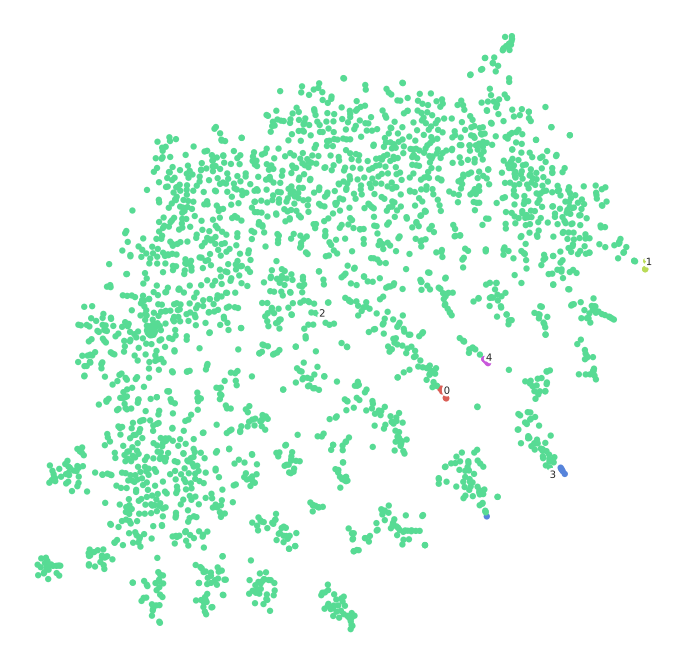

In [37]:
kmeans_before = KMeans(n_clusters=5, random_state=0).fit(np.array(X))

# cluster = np.where(kmeans_before.labels_ == 2)[0]
# print(len(cluster))
# for i in cluster:
#     print(X[i])
#     #Y1,Y2 = Embedding(X[i],X[i])
#     #print(Y1,"\n")

fashion_tsne = TSNE(random_state=123).fit_transform(X)
fashion_scatter(fashion_tsne, kmeans_before.labels_)

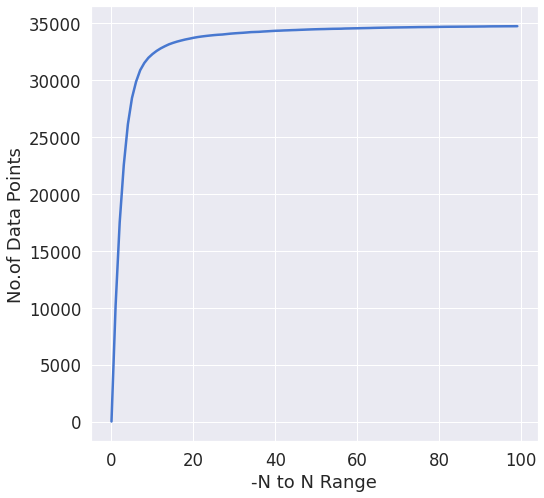

In [38]:
def R_Threshold(X):
    
    x_axis = []
    y_axis = []
    for n in range(100):
        count = 0
        for i in X:
            for j in i:
                if j >= 0 and j < n:
                    count += 1
                if j < 0 and j > -n:
                    count += 1
        
        x_axis.append(n)
        y_axis.append(count)
        
    
    plt.figure(figsize = (8,8))
    plt.xlabel("-N to N Range")
    plt.ylabel("No.of Data Points")
    plt.plot(x_axis,y_axis)
    plt.show()
    
#     for j in range(len(x_axis)):
#         print(x_axis[j],", ",y_axis[j]/(len(X)*len(X[0])))
        
    r_threshold = 0
    for i in range(len(x_axis)):
        if y_axis[i]/(len(X)*len(X[0])) > 0.99:
            r_threshold = x_axis[i]
            
    
    for i in range(len(X)):
        for j in range(len(X[0])):
            if X[i][j] > r_threshold:
                X[i][j] = r_threshold
            elif X[i][j] < -r_threshold:
                X[i][j] = -r_threshold
                
    return X, np.around(np.array(X)/r_threshold,4), r_threshold
    
    
X_Cap, X_Normalised, R_threshold = R_Threshold(X)
                
            

In [39]:
# Normalised Raw Data

# kmeans_Embedding = KMeans(n_clusters=5, random_state=0).fit((X_Normalised))
# fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding)
# fashion_scatter(fashion_tsne, kmeans_Embedding.labels_)

In [40]:
#cluster = np.where(kmeans_after.labels_ == 2)[0]
#print(len(cluster))

# for i in cluster:
# #     print(Transformed_Dict[str(T_X[i])])
# #     print(T_X[i],\"\\n\")
#     #Y1,Y2 = Embedding(X[i],X[i])
#     #print(Y1,\"\\n\")
#     plt.plot(range(14),Transformed_Dict[str(T_X[i])])

# plt.show()

In [41]:
# Data = []
# for i in T_X:
#     Data.append(Transformed_Dict[str(i)])

# fashion_tsne = TSNE(random_state=123).fit_transform(T_X)
# fashion_scatter(fashion_tsne, kmeans_after.labels_)


Avg Node Cluster Distance of Cluster  0  is  12.723857
Cluster  0  Center  [28.91695  26.789497]
Avg Node Cluster Distance of Cluster  1  is  30.149046
Cluster  1  Center  [-27.2297     -1.2831266]
Avg Node Cluster Distance of Cluster  2  is  7.8596687
Cluster  2  Center  [53.77534  -9.427385]
Avg Node Cluster Distance of Cluster  3  is  9.920003
Cluster  3  Center  [47.872536  9.938282]
Avg Node Cluster Distance of Cluster  4  is  12.508708
Cluster  4  Center  [ 28.33045  -13.198408]
Cluster Distance between  0  and others 
1   62.773552
2   43.927235
3   25.36292
4   39.992207
Cluster Distance between  1  and others 
0   62.773552
2   81.41343
3   75.93593
4   56.82345
Cluster Distance between  2  and others 
0   43.927235
1   81.41343
3   20.2453
4   25.722815
Cluster Distance between  3  and others 
0   25.36292
1   75.93593
2   20.2453
4   30.285303
Cluster Distance between  4  and others 
0   39.992207
1   56.82345
2   25.722815
3   30.285303


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


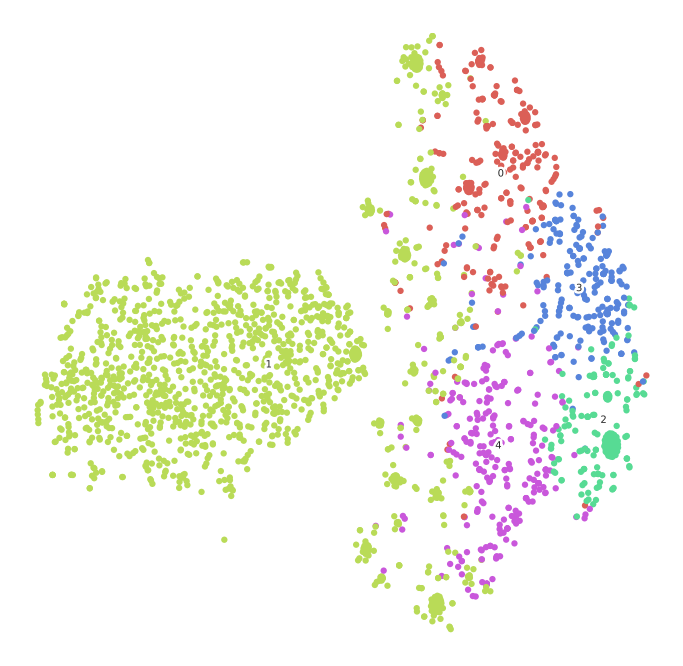

In [42]:
def Embedding1(X):          # Separating +ve's and -ve's with    1 and -1  
    
    embeddings = []
    for i in X:
        l = []
        for j in i:
            if j >= 0:
                #l.append(1)
                l.append(j)
            elif j < 0:
                #l.append(-1)
                l.append(-1)
                
        l = np.array(l)
        l = l.round(decimals=2)
        embeddings.append(l)
        
    return embeddings

X_Embedding1 = Embedding1(X_Normalised)

kmeans_Embedding1 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding1))
fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding1)
fashion_scatter(fashion_tsne, kmeans_Embedding1.labels_)

Avg Node Cluster Distance of Cluster  0  is  9.704338
Cluster  0  Center  [-9.106505 54.633034]
Avg Node Cluster Distance of Cluster  1  is  13.772009
Cluster  1  Center  [-32.823906  14.426706]
Avg Node Cluster Distance of Cluster  2  is  13.519917
Cluster  2  Center  [ 7.6058073 30.956253 ]
Avg Node Cluster Distance of Cluster  3  is  28.631367
Cluster  3  Center  [  6.7659473 -24.23191  ]
Avg Node Cluster Distance of Cluster  4  is  10.917163
Cluster  4  Center  [-23.096725  38.597095]
Cluster Distance between  0  and others 
1   46.680447
2   28.980879
3   80.44634
4   21.28092
Cluster Distance between  1  and others 
0   46.680447
2   43.67823
3   55.33394
4   26.054285
Cluster Distance between  2  and others 
0   28.980879
1   43.67823
3   55.194553
4   31.639027
Cluster Distance between  3  and others 
0   80.44634
1   55.33394
2   55.194553
4   69.56481
Cluster Distance between  4  and others 
0   21.28092
1   26.054285
2   31.639027
3   69.56481


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


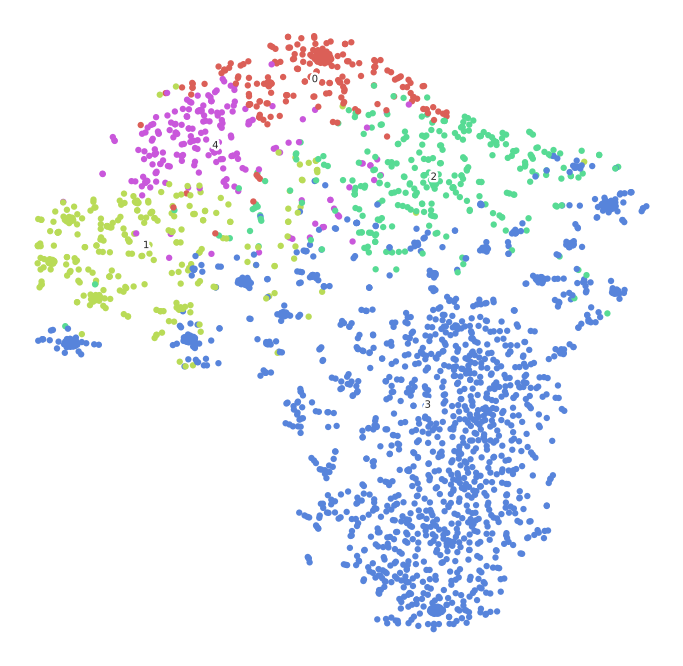

In [43]:
def Embedding2(X,R_threshold):            #  Transformed and Normalised Data
    
    embeddings = []
    for i in X:

        l = [0]
        for j in range(len(i)):
            if i[j] >= 0:
                if j > 0 and j < len(i) -1:
                    l.append((abs(i[j]) - abs(i[j+1]))/R_threshold)
                elif j == len(i)-1:
                    l.append(0)
                #l.append(1)
                l.append(i[j]/R_threshold)
                
            elif i[j] < 0:
                if j > 0 and j < len(i) - 1:
                    l.append((abs(i[j]) - abs(i[j+1]))/R_threshold)
                elif j == len(i)-1:
                    l.append(0)
                #l.append(-1)
                l.append(1 - abs(i[j])/R_threshold)
                
        l = np.array(l)
        l = l.round(decimals=2)
        embeddings.append(l)
        
    return embeddings

X_Embedding2 = Embedding2(X_Cap,R_threshold)

kmeans_Embedding2 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding2))
fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding2)
fashion_scatter(fashion_tsne, kmeans_Embedding2.labels_)

In [44]:
def Transform2(X,R_threshold):
    transform_vectors = []
    Dict = {}
    for i in X:
        new_vec = []
        
        i = [x or 0.1 for x in i]
        
        for j in range(1,len(i)):
            
            if (i[j-1] > 0) & (i[j] > 0):
                if i[j-1] > i[j]:
                    new_vec.append((i[j-1] - i[j])/i[j])
                elif i[j-1] < i[j]:
                    new_vec.append(-(i[j-1] - i[j])/i[j])
                else:
                    new_vec.append(1/i[j])
                
            elif (i[j-1] < 0) & (i[j] < 0):
                if i[j-1] > i[j]:
                    new_vec.append((i[j-1] - i[j])/i[j])
                elif i[j-1] < i[j]:
                    new_vec.append((i[j-1] - i[j])/abs(i[j]))
                else:
                    new_vec.append(1/i[j])
                
            elif (i[j-1] > 0) & (i[j] < 0):
                new_vec.append((i[j-1] - i[j])/(i[j]))
            
            elif (i[j-1] < 0) & (i[j] > 0):
                new_vec.append((i[j] - i[j-1])/i[j])
                
                
        new_vec = np.array(new_vec)
        new_vec = new_vec.round(decimals=2)
        Dict[str(new_vec)] = i
        transform_vectors.append(new_vec)
        
        
    return Dict, transform_vectors

Avg Node Cluster Distance of Cluster  0  is  35.714314
Cluster  0  Center  [-0.14077142 -0.26941007]
Avg Node Cluster Distance of Cluster  1  is  0.037903536
Cluster  1  Center  [56.817257 16.091333]
Avg Node Cluster Distance of Cluster  2  is  0.44820634
Cluster  2  Center  [ 9.759321 64.39378 ]
Avg Node Cluster Distance of Cluster  3  is  0.0005174925
Cluster  3  Center  [-40.438644 -34.120857]
Avg Node Cluster Distance of Cluster  4  is  0.0
Cluster  4  Center  [-46.703533  14.858703]
Cluster Distance between  0  and others 
1   59.261208
2   65.416664
3   52.629265
4   48.958664
Cluster Distance between  1  and others 
0   59.261208
2   67.43572
3   109.45307
4   103.52813
Cluster Distance between  2  and others 
0   65.416664
1   67.43572
3   110.56659
4   75.11177
Cluster Distance between  3  and others 
0   52.629265
1   109.45307
2   110.56659
4   49.3786
Cluster Distance between  4  and others 
0   48.958664
1   103.52813
2   75.11177
3   49.3786


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


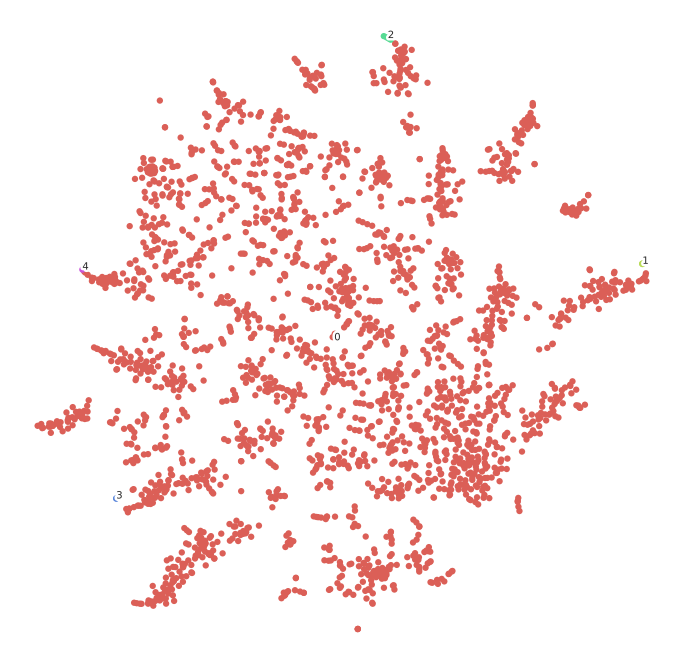

In [45]:
Transformed_Dict, T_X = Transform2(X_Cap,R_threshold)

# print(X[0])
# for i in T_X:
#     print(i)
#     break

kmeans_after = KMeans(n_clusters=5, random_state=0).fit(np.array(T_X))
fashion_tsne = TSNE(random_state=123).fit_transform(T_X)
fashion_scatter(fashion_tsne, kmeans_after.labels_)

Avg Node Cluster Distance of Cluster  0  is  15.982167
Cluster  0  Center  [ 33.513565 -14.756712]
Avg Node Cluster Distance of Cluster  1  is  31.518171
Cluster  1  Center  [-3.6091747 26.506983 ]
Avg Node Cluster Distance of Cluster  2  is  10.415197
Cluster  2  Center  [ 11.588708 -50.20838 ]
Avg Node Cluster Distance of Cluster  3  is  13.859574
Cluster  3  Center  [  8.665231 -28.054474]
Avg Node Cluster Distance of Cluster  4  is  14.714265
Cluster  4  Center  [-21.10933  -34.353786]
Cluster Distance between  0  and others 
1   55.504868
2   41.683575
3   28.1828
4   58.03194
Cluster Distance between  1  and others 
0   55.504868
2   78.20628
3   55.92507
4   63.32684
Cluster Distance between  2  and others 
0   41.683575
1   78.20628
3   22.34597
4   36.339096
Cluster Distance between  3  and others 
0   28.1828
1   55.92507
2   22.34597
4   30.433628
Cluster Distance between  4  and others 
0   58.03194
1   63.32684
2   36.339096
3   30.433628


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


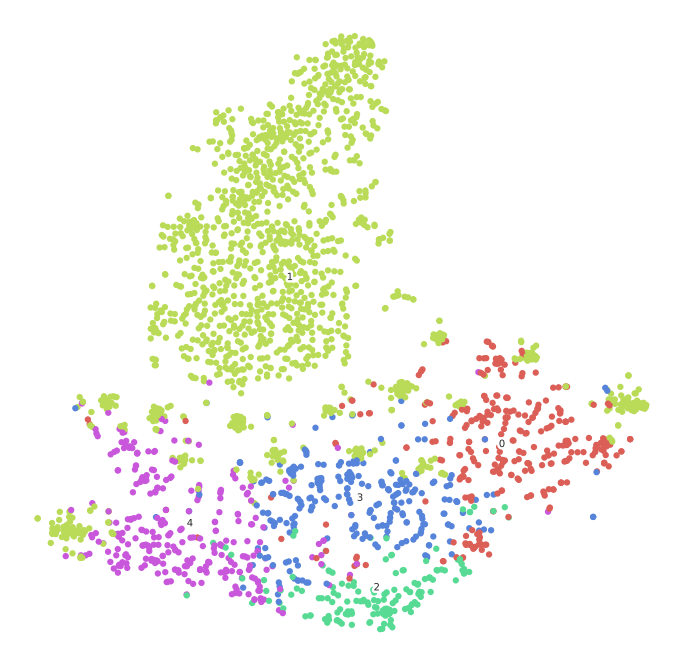

In [46]:
def Embedding3(X):           # Raw Data 1/X
    
    embeddings = []
    for i in X:
        l = []
        i = [x or 0.1 for x in i]
        for j in i:
            l.append(1/j)
                
        l = np.array(l)
        l = l.round(decimals=2)
        embeddings.append(l)
        
    return embeddings

X_Embedding3 = Embedding3(X_Cap)

kmeans_Embedding3 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding3))
fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding3)
fashion_scatter(fashion_tsne, kmeans_Embedding3.labels_)

Avg Node Cluster Distance of Cluster  0  is  22.219955
Cluster  0  Center  [  8.768551 -20.799236]
Avg Node Cluster Distance of Cluster  1  is  9.659711
Cluster  1  Center  [-22.715673  37.39886 ]
Avg Node Cluster Distance of Cluster  2  is  13.4432
Cluster  2  Center  [-30.851898    5.6425724]
Avg Node Cluster Distance of Cluster  3  is  14.492018
Cluster  3  Center  [14.792854 28.790989]
Avg Node Cluster Distance of Cluster  4  is  11.907367
Cluster  4  Center  [-7.154646 17.510317]
Cluster Distance between  0  and others 
1   66.16853
2   47.633488
3   49.954807
4   41.486988
Cluster Distance between  1  and others 
0   66.16853
2   32.78201
3   38.48357
4   25.252718
Cluster Distance between  2  and others 
0   47.633488
1   32.78201
3   51.179024
4   26.502888
Cluster Distance between  3  and others 
0   49.954807
1   38.48357
2   51.179024
4   24.676838
Cluster Distance between  4  and others 
0   41.486988
1   25.252718
2   26.502888
3   24.676838


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


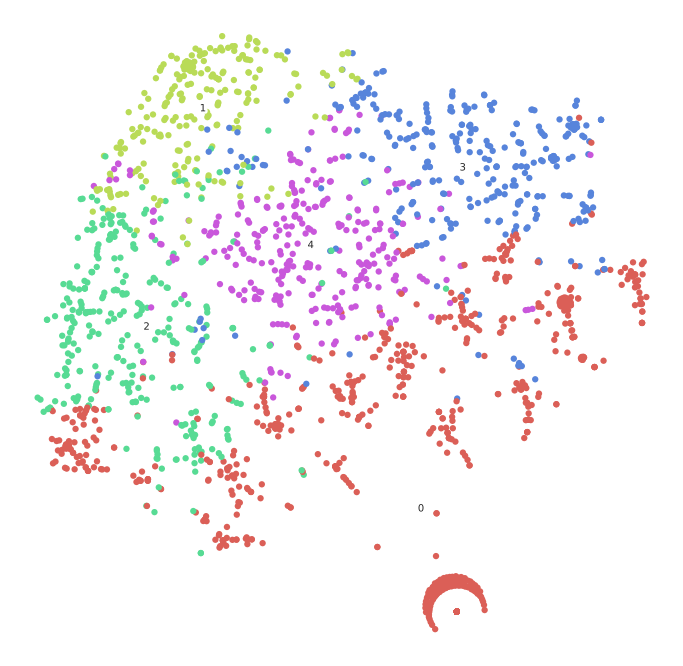

In [51]:
def Embedding4(X):          
    
    embeddings = []
    for i in X:
        l = []
        i = [x or 0.1 for x in i]
        for j in i:
            if j >= 1:
                l.append(1)
            elif j < 0:
                l.append(1)
            elif j < 1 and j >= 0:
                l.append(j)
                
        l = np.array(l)
        l = l.round(decimals=2)
        embeddings.append(l)
        
    return  embeddings#Embedding2(embeddings,1)

X_Embedding4 = Embedding4(X_Cap)

kmeans_Embedding4 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding4))
fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding4)
fashion_scatter(fashion_tsne, kmeans_Embedding4.labels_)

In [81]:
cluster = np.where(kmeans_Embedding4.labels_ == 4)[0]
print(len(cluster))

for i in cluster:
    print(X_Embedding4[i])


310
[1.  1.  0.1 1.  1.  0.9 0.1 0.2 1.  1.  1.  1.  1.  1. ]
[1.  1.  1.  1.  1.  1.  0.1 0.1 0.1 0.5 1.  1.  1.  1. ]
[1.  1.  1.  0.1 1.  1.  0.1 0.1 0.1 1.  0.2 0.1 1.  1. ]
[0.8 1.  1.  1.  1.  1.  0.6 0.2 0.1 0.3 1.  1.  1.  1. ]
[1.  1.  1.  1.  1.  1.  0.1 0.1 0.1 1.  1.  1.  1.  0.1]
[1.  1.  0.1 1.  1.  1.  0.1 0.1 0.2 0.1 1.  1.  1.  1. ]
[1.  1.  1.  1.  1.  1.  0.7 0.3 0.1 0.3 0.6 1.  1.  1. ]
[1.  1.  0.1 0.2 0.6 0.1 0.9 0.1 0.1 0.1 1.  1.  0.5 0.9]
[1.  1.  1.  0.2 0.1 0.1 0.1 0.1 1.  1.  0.6 0.1 0.1 1. ]
[1.  1.  0.1 1.  1.  1.  0.1 0.1 0.1 0.2 0.1 0.9 0.8 0.5]
[1.  0.6 0.7 1.  0.2 0.1 0.4 0.9 0.4 1.  1.  1.  1.  1. ]
[1.  1.  1.  1.  1.  0.1 0.1 0.1 0.1 0.4 0.1 0.1 0.1 1. ]
[1.  1.  1.  1.  0.1 0.1 0.2 1.  0.5 0.3 0.6 0.5 0.9 1. ]
[1.  0.1 1.  0.1 0.1 0.1 0.1 0.1 0.8 1.  1.  1.  1.  1. ]
[0.8 1.  1.  1.  1.  0.6 1.  0.1 0.7 0.2 1.  1.  1.  0.3]
[1.  1.  1.  1.  1.  1.  0.4 0.4 0.1 0.5 0.5 0.5 1.  1. ]
[1.  1.  0.1 0.1 0.1 1.  1.  0.1 0.1 0.1 0.2 1.  1.  1. ]
[1.  1.  1

Avg Node Cluster Distance of Cluster  0  is  18.090717
Cluster  0  Center  [ 16.87506 -23.25048]
Avg Node Cluster Distance of Cluster  1  is  19.20592
Cluster  1  Center  [22.172346 15.354997]
Avg Node Cluster Distance of Cluster  2  is  17.585217
Cluster  2  Center  [24.39736   -2.7685368]
Avg Node Cluster Distance of Cluster  3  is  24.28115
Cluster  3  Center  [-20.73199     1.1442755]
Avg Node Cluster Distance of Cluster  4  is  9.66383
Cluster  4  Center  [46.51644  -1.343441]
Cluster Distance between  0  and others 
1   38.967216
2   21.819601
3   44.826267
4   36.858242
Cluster Distance between  1  and others 
0   38.967216
2   18.259604
3   45.196533
4   29.520718
Cluster Distance between  2  and others 
0   21.819601
1   18.259604
3   45.298656
4   22.164942
Cluster Distance between  3  and others 
0   44.826267
1   45.196533
2   45.298656
4   67.294426
Cluster Distance between  4  and others 
0   36.858242
1   29.520718
2   22.164942
3   67.294426


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


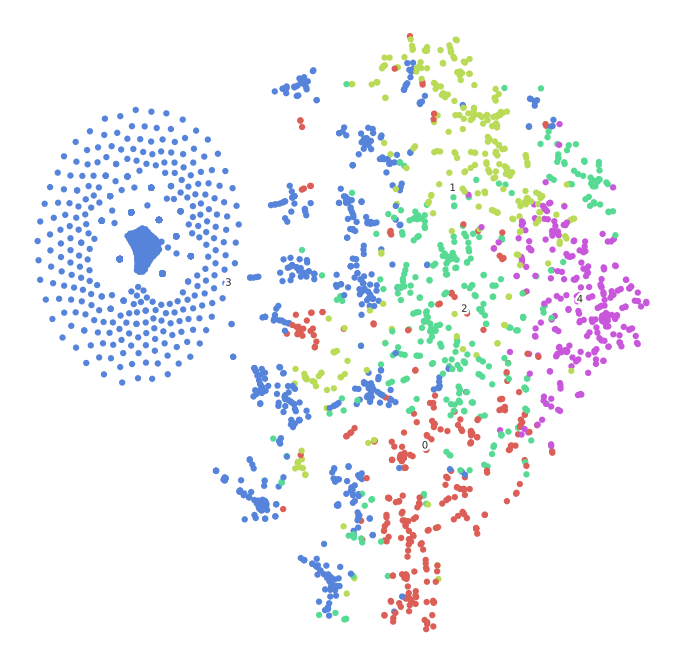

In [49]:

def Embedding5(X,R_threshold):         
    
    embeddings = []
    for i in X:

        l = [0]
        for j in range(len(i)):
            if j > 0 and j < len(i) -1:
                l.append((abs(i[j]) - abs(i[j+1]))/R_threshold)
            elif j == len(i)-1:
                l.append(0)
            l.append(i[j]/R_threshold)

                
        l = np.array(l)
        l = l.round(decimals=2)
        embeddings.append(l)
        
    return embeddings

X_Embedding5 = Embedding5(X_Embedding4,1)

kmeans_Embedding5 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding5))
fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding5)
fashion_scatter(fashion_tsne, kmeans_Embedding5.labels_)

In [62]:
# cluster = np.where(kmeans_Embedding5.labels_ == 3)[0]
# print(len(cluster))

# for i in cluster:
#     print(X_Embedding5[i])


Avg Node Cluster Distance of Cluster  0  is  13.109595
Cluster  0  Center  [11.919989   4.0946693]
Avg Node Cluster Distance of Cluster  1  is  7.5724454
Cluster  1  Center  [-33.89296  -23.621302]
Avg Node Cluster Distance of Cluster  2  is  17.043898
Cluster  2  Center  [-27.263351    6.8798385]
Avg Node Cluster Distance of Cluster  3  is  7.8727355
Cluster  3  Center  [-13.735421 -26.874289]
Avg Node Cluster Distance of Cluster  4  is  11.332403
Cluster  4  Center  [-26.391005    7.4502196]
Cluster Distance between  0  and others 
1   53.544388
2   39.282204
3   40.215374
4   38.457664
Cluster Distance between  1  and others 
0   53.544388
2   31.21332
3   20.418333
4   31.964336
Cluster Distance between  2  and others 
0   39.282204
1   31.21332
3   36.364075
4   1.0422685
Cluster Distance between  3  and others 
0   40.215374
1   20.418333
2   36.364075
4   36.58327
Cluster Distance between  4  and others 
0   38.457664
1   31.964336
2   1.0422685
3   36.58327


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


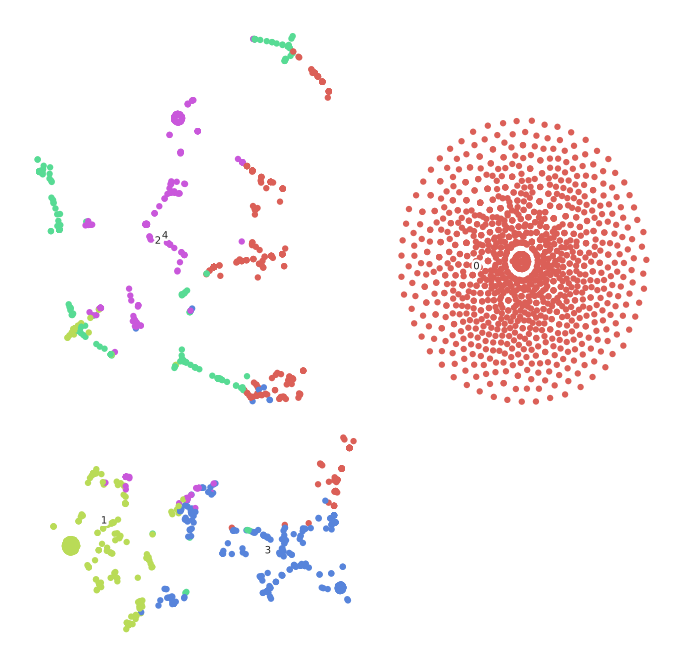

In [70]:
X_Embedding_last5 = Embedding4(X_5)

kmeans_Embedding_last5 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding_last5))
fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding_last5)
fashion_scatter(fashion_tsne, kmeans_Embedding_last5.labels_)

In [69]:
cluster = np.where(kmeans_Embedding_last5.labels_ == 4)[0]
print(len(cluster))

for i in cluster:
    print(X_Embedding_last5[i])

241
[1.  1.  1.  1.  0.1]
[1.  1.  1.  1.  0.1]
[1.  1.  1.  0.5 0.1]
[1.  1.  1.  1.  0.1]
[0.8 1.  1.  0.5 0.3]
[1.  0.9 1.  1.  0.4]
[1.  1.  1.  0.3 0.1]
[1.  1.  0.6 0.1 0.1]
[1.  1.  1.  1.  0.4]
[1.  1.  1.  0.1 0.1]
[1.  0.9 0.6 0.1 0.1]
[0.8 1.  0.8 0.7 0.2]
[1.  1.  1.  0.2 0.4]
[1.  0.1 1.  1.  0.6]
[1.  1.  1.  1.  0.1]
[1.  1.  1.  1.  0.1]
[1.  1.  1.  0.1 0.1]
[0.6 1.  1.  0.9 0.2]
[0.6 1.  0.7 1.  0.1]
[1.  1.  1.  1.  0.1]
[1.  1.  1.  0.1 0.4]
[1.  1.  1.  1.  0.1]
[1.  1.  1.  1.  0.1]
[1.  1.  1.  1.  0.2]
[0.6 0.8 1.  1.  0.1]
[1.  1.  1.  0.1 0.5]
[0.7 1.  1.  0.1 0.1]
[0.7 1.  1.  0.6 0.5]
[1.  1.  1.  0.9 0.1]
[0.1 1.  1.  0.1 0.1]
[0.3 1.  0.8 0.7 0.4]
[1.  1.  1.  0.1 0.7]
[1.  1.  1.  0.1 0.1]
[1.  1.  1.  0.1 0.1]
[1.  1.  1.  0.2 0.3]
[1.  1.  0.9 1.  0.1]
[0.1 1.  1.  0.1 0.1]
[1.  0.1 1.  0.1 0.1]
[1.  1.  1.  1.  0.1]
[1.  1.  1.  0.2 0.1]
[1.  1.  1.  1.  0.1]
[1.  0.9 0.9 1.  0.1]
[1.  1.  1.  0.1 0.1]
[1.  0.1 1.  0.1 0.1]
[0.6 1.  1.  1.  0.1]
[1.  1